<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Sushant/Deep_Learning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
timeit

<module 'timeit' from '/usr/lib/python3.7/timeit.py'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import timeit

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.889985462000027
GPU (s):
0.039175340999975106
GPU speedup over CPU: 73x


In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
#Lets look at the training data
print("Training Images Shape: ",train_images.shape)
print("Training Labels: ",train_labels)

#Lets look at the testing data
print("Testing Images Shape: ",test_images.shape)
print("Testing Labels: ",test_labels)

Training Images Shape:  (60000, 28, 28)
Training Labels:  [5 0 4 ... 5 6 8]
Testing Images Shape:  (10000, 28, 28)
Testing Labels:  [7 2 1 ... 4 5 6]


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [114]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu',name="second_last_layser"),
    layers.Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dense_13 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_14 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_15 (Dense)            (None, 1024)              1049600   
                                                                 
 second_last_layser (Dense)  (None, 1024)              1049600   
                                                                 
 dense_16 (Dense)            (None, 10)               

In [115]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [116]:
model.fit(train_images , train_labels ,epochs = 30, batch_size = 256)

Epoch 1/30
235/235 [==============================] - 2s 5ms/step - loss: 3.8360 - sparse_categorical_accuracy: 0.8616
Epoch 2/30
235/235 [==============================] - 1s 5ms/step - loss: 0.1198 - sparse_categorical_accuracy: 0.9628
Epoch 3/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9764
Epoch 4/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0563 - sparse_categorical_accuracy: 0.9819
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0507 - sparse_categorical_accuracy: 0.9840
Epoch 6/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0426 - sparse_categorical_accuracy: 0.9862
Epoch 7/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0441 - sparse_categorical_accuracy: 0.9860
Epoch 8/30
235/235 [==============================] - 1s 5ms/step - loss: 0.0413 - sparse_categorical_accuracy: 0.9869
Epoch 9/30
235/235 [============================

In [117]:
evaluation = model.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.1256 - sparse_categorical_accuracy: 0.9814


In [118]:
evaluation

[0.1256275773048401, 0.9814000129699707]

# Problem 1 Part 3

In [119]:
prediction = model.predict(test_images)

In [120]:
prediction.shape

(10000, 10)

In [121]:
prediction[:3].argmax()

7

In [122]:
prediction[0:10]

array([[9.7063133e-17, 2.1894909e-14, 8.1437600e-11, 1.9166686e-12,
        6.2166103e-15, 6.4975003e-16, 3.3354143e-16, 1.0000000e+00,
        3.8409120e-13, 5.2894938e-10],
       [1.9330759e-27, 1.1056159e-23, 1.0000000e+00, 3.4971881e-18,
        3.7861378e-19, 4.0868777e-27, 1.4577563e-25, 1.0966078e-20,
        5.6468044e-24, 3.3435515e-33],
       [1.8549952e-22, 1.0000000e+00, 8.4524438e-17, 4.8921679e-14,
        6.1090183e-20, 2.8753165e-17, 2.9576788e-21, 1.6735741e-22,
        2.0171207e-16, 1.9778446e-21],
       [1.0000000e+00, 7.7891470e-21, 3.3440903e-16, 2.2499260e-16,
        2.4287988e-17, 2.0903695e-19, 1.9318705e-16, 4.0546235e-20,
        9.4733372e-16, 3.3354798e-15],
       [2.4556070e-07, 9.3262386e-08, 2.5745462e-07, 1.4871845e-08,
        9.9802029e-01, 1.4235899e-06, 1.0497203e-04, 6.9081074e-07,
        1.6997751e-07, 1.8719028e-03],
       [2.5026292e-25, 1.0000000e+00, 9.1412846e-19, 5.0888887e-16,
        4.6073859e-22, 1.6833730e-19, 1.2462872e-23, 8.05

In [123]:
predictions_1000 = prediction[:1000]

[750 895 424 904 297 644 642 296 440 101]
[523 695 675 682 332 330 329 135 137 700]
[512 731 715 633 387 796 816 258 547 945]
[808 334 158 335 343 782 780 349 923 925]
[712 770 238  85 248 544 670 953 910 399]
[375 710 739 182 167 165 162 155 153 152]
[861 942 732  66 123 737 316 625 623 743]
[  0 370 930 825 141 822 133 383 410 122]
[299 580 899 184 181 179 177 709 146 914]
[999 671 281 598 913 599 252 788 616 928]


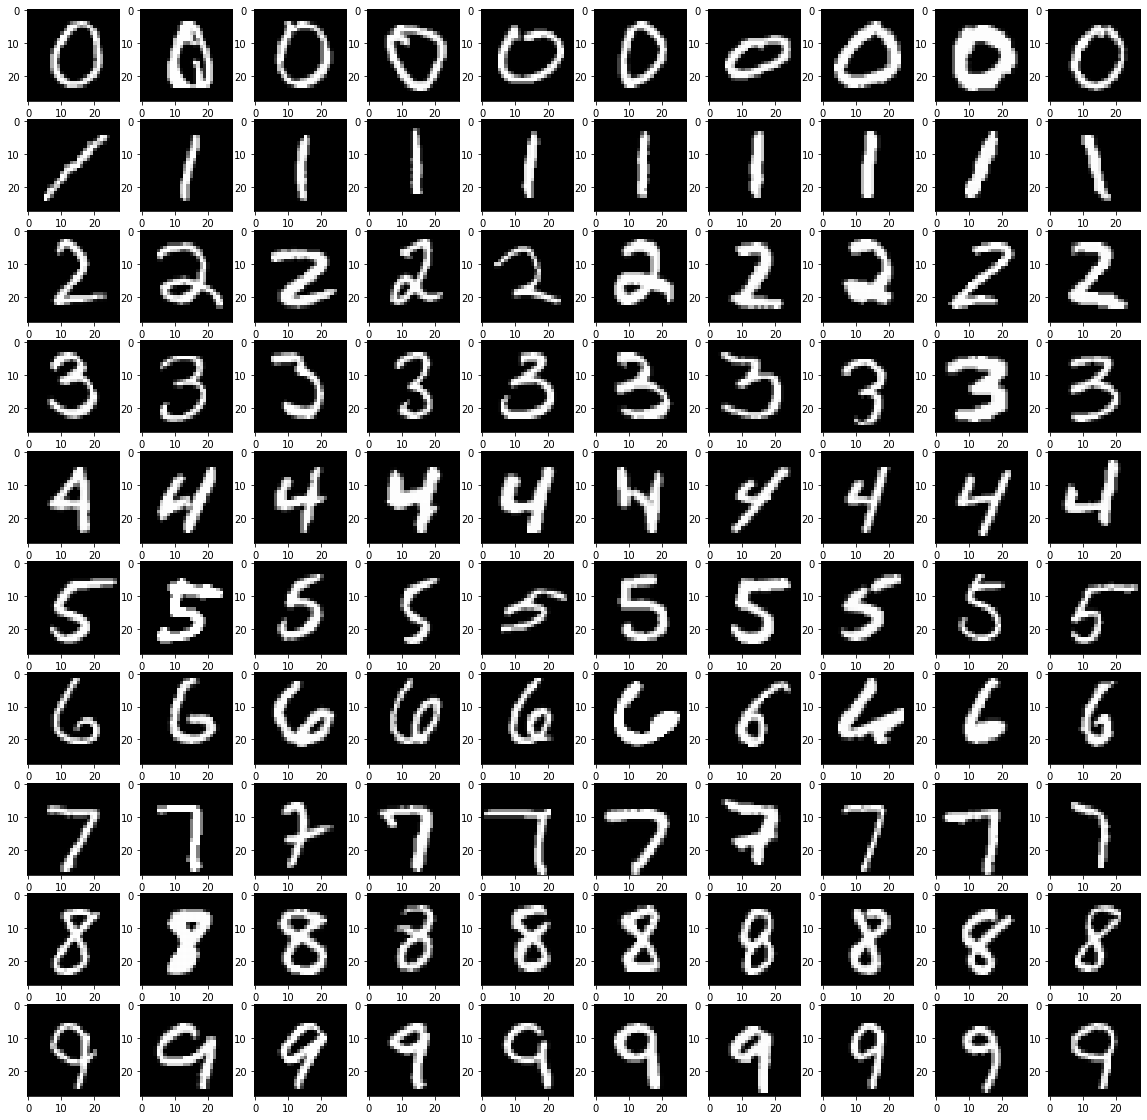

In [124]:
fig, axs = plt.subplots(10, 10, figsize=(20,20))
for i in range(0,10):
  image_pred = np.argsort(predictions_1000[:,i])[::-1][:10]
  print(image_pred)
  for j in range(10):
    axs[i,j].imshow(test_images[image_pred[j]], cmap=plt.get_cmap('gray'))
plt.show()

# Problem 1 Part 4

In [125]:
layer_second_last = model.layers[-2].output

In [126]:
layer_second_last.shape

TensorShape([None, 1024])

In [127]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dense_13 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_14 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_15 (Dense)            (None, 1024)              1049600   
                                                                 
 second_last_layser (Dense)  (None, 1024)              1049600   
                                                                 
 dense_16 (Dense)            (None, 10)               

In [128]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="second_last_layser").output,
)

# features is output of the model till second last layer
features = feature_extractor(test_images[:10000])

In [129]:
pred_2_last = np.array(features)

In [130]:
np_features = tf.nn.softmax(pred_2_last[np.random.choice(a=range(10000),size=1000,replace=False),:][:,np.random.choice(a=range(1024),size=10,replace=False)]).numpy().argmax(axis=1)


In [131]:
np_features

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

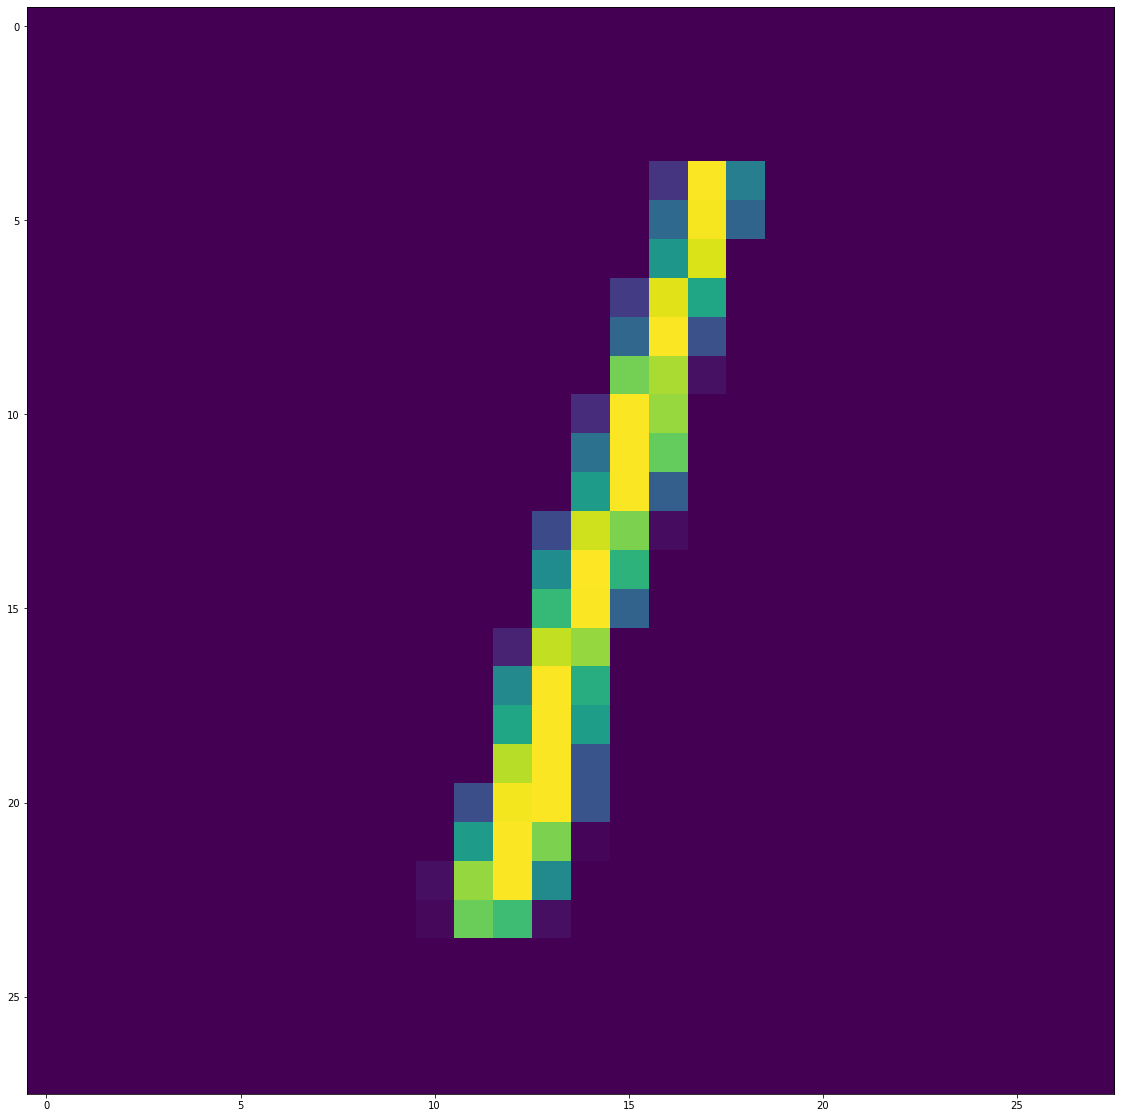

In [85]:
plt.imshow(test_images[2])

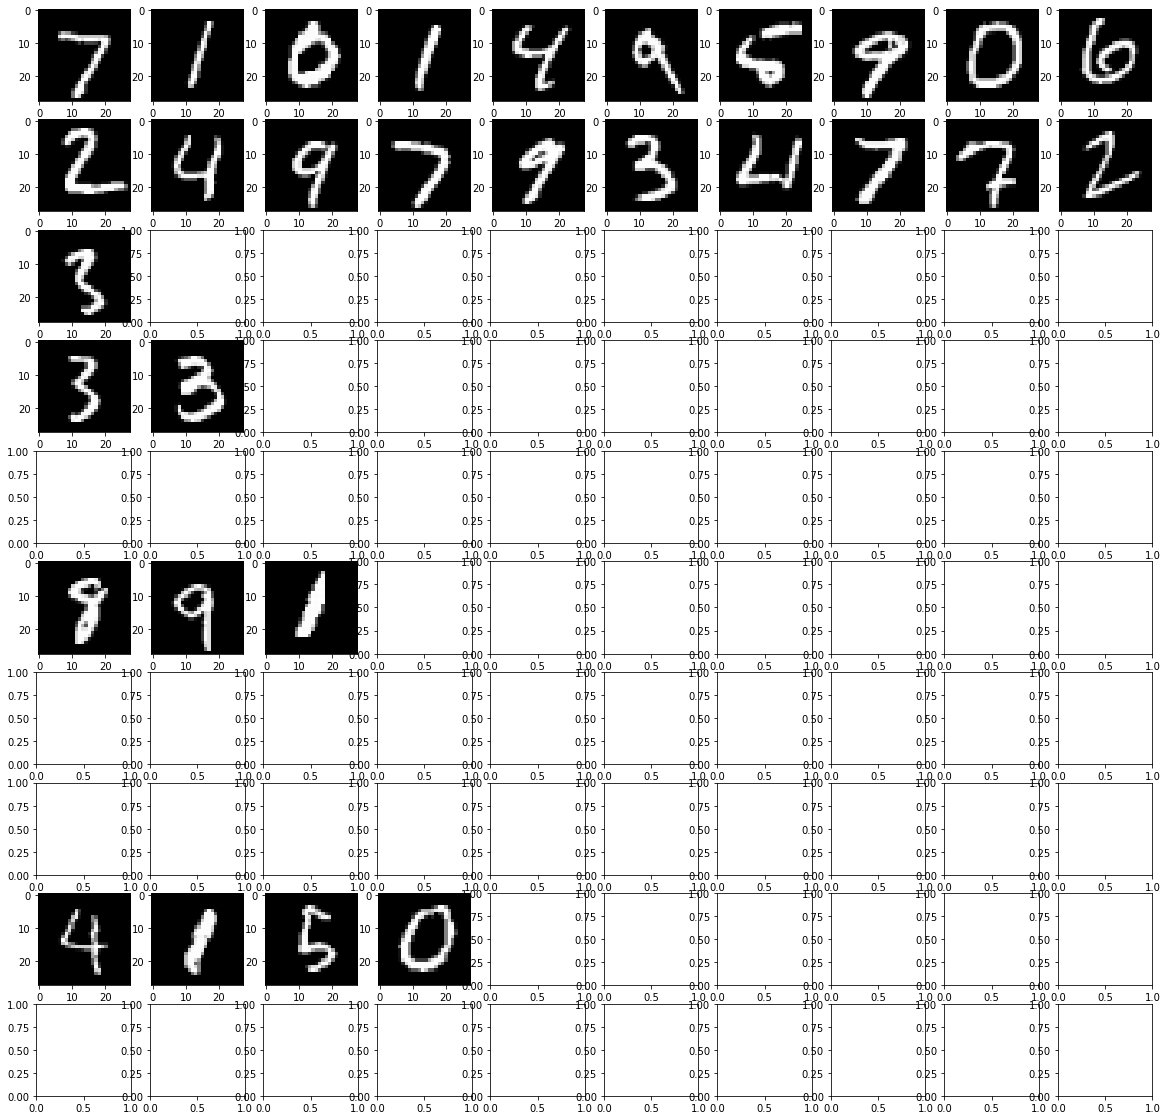

In [133]:
fig, axs = plt.subplots(10, 10)
for i in range(10):  
    result = np.where(np_features==i)[0][:10]
    for j in range(10):
      try:
          axs[i,j].imshow(test_images[result[j]], cmap=plt.get_cmap('gray'))
      except:
          continue
plt.show()

In [132]:
model_save = model.save('content/drive/')

In [ ]:
model_2 = 